In [1]:
%matplotlib ipympl
import time

import minigeo.mpl_geometry as mgeo
from matplotlib import pyplot as plt
from minigeo.geometry import (
    BaseAxis,
    BaseBox,
    BaseCircle,
    BaseCone,
    BaseCylinder,
    BaseLine,
    BasePoint,
    BasePolygon,
    BaseRectangle,
    Transform,
)
from minigeo.mpl_geometry import MplBox, MplCone, MplCube, MplPoly

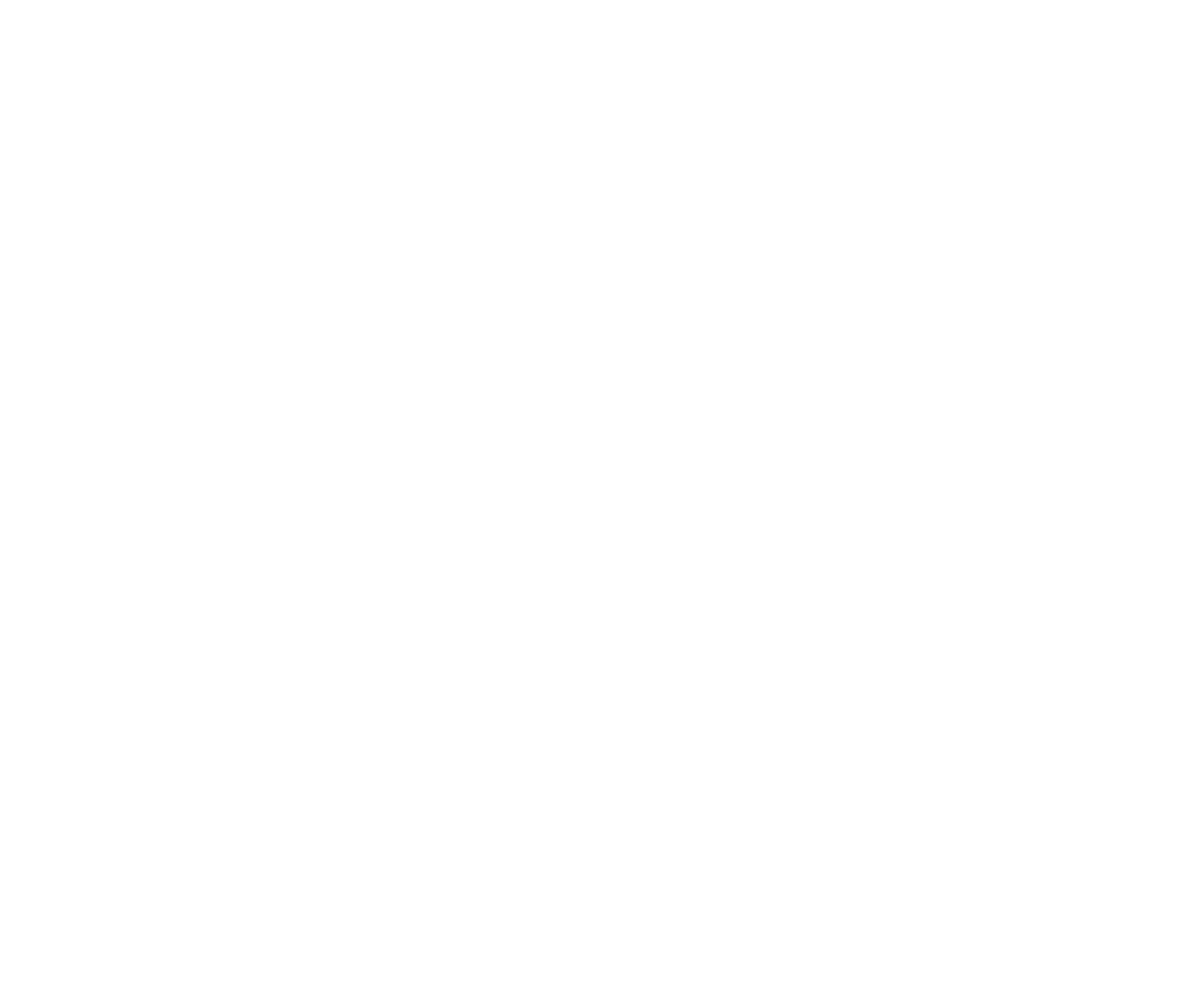

Text(0.5, 0.92, 'Cristallina X-ray scattering sketch (Orientation from You, 1999)')

In [2]:
def display_immediately(fig):
    canvas = fig.canvas
    display(canvas)
    canvas._handle_message(canvas, {'type': 'send_image_mode'}, [])
    canvas._handle_message(canvas, {'type':'refresh'}, [])
    canvas._handle_message(canvas,{'type': 'initialized'},[])
    canvas._handle_message(canvas,{'type': 'draw'},[])
    
with plt.ioff():
    fig = plt.figure(figsize=(12, 10), constrained_layout=True)

display_immediately(fig)


ax = fig.add_subplot(
    111,
    projection="3d",
    computed_zorder=False,
)

# Room dimensions
room_width = 7  # y-axis
room_depth = 5  # z-axis
tile_z_offset = 1
tile_size = 0.6
tile_thickness = 0.1
tile_x_offset = -1.38

# Create floor tiles
num_tiles_width = int(room_width / tile_size)
num_tiles_depth = int(room_depth / tile_size)

for i in range(num_tiles_width):
    for j in range(num_tiles_depth):
        y = i * tile_size - room_width / 2
        z = j * tile_size - room_depth / 2 + tile_z_offset
        tile = MplBox(
            ax,
            center=(tile_x_offset, y, z),
            dimensions=(tile_thickness, tile_size, tile_size),
            color="lightgray",
            alpha=1,
        )

# KB dimensions and position
KB_y = -4.5
KB_height = 1.7  # x-axis
KB_length = 3    # y-axis
KB_width = 2     # z-axis

# Create the KB mirrors
KB_center = (tile_x_offset + KB_height / 2, KB_y + KB_length / 2, 0)
KB_dimensions = (KB_height, KB_length, KB_width)
KB = MplBox(ax, center=KB_center, dimensions=KB_dimensions, color="darkgrey", alpha=1)


# Line exiting the box
line_height = 0  # x-axis
line_start = [line_height, KB_y + KB_length, 0]
line_end = [line_height, KB_y + KB_length + 1.5, 0]  # Extend 5 meters out

ax.plot(
    [line_start[0], line_end[0]],
    [line_start[1], line_end[1]],
    [line_start[2], line_end[2]],
    color="blue",
    linewidth=2,
)


# virtual x ray trajectory
line_height = 0  # x-axis
line_start = [line_height, KB_y + KB_length + 1.5, 0]
line_end = [line_height, KB_y + KB_length + 4, 0]  # Extend 4 meters out

ax.plot(
    [line_start[0], line_end[0]],
    [line_start[1], line_end[1]],
    [line_start[2], line_end[2]],
    color="blue",
    linewidth=1,
    linestyle="dashed",
)


# Small sample cube at origin
cube_size = 0.3
cube_x = 0
cube_y = 0
cube_z = 0

cube = MplCube(ax, center=(cube_x, cube_y, cube_z), size=cube_size)
cube.rotate("x", 10)
cube.rotate("y", 0)
cube.add_face_labels()


# detector
detector_width = 0.4
detector_height = 0.6
detector_depth = 0.1
detector = MplBox(
    ax, center=(0, 1, 0), dimensions=(detector_height, detector_depth, detector_width), color="C0", alpha=0.75
)
# negative 45 degree rotation around x-axis corresponds to positive nu rotation according to You, 1999
# detector.rotate("x", -45, around_origin=True)
# positive around z-axis corresponds to positive delta rotation according to You, 1999
# detector.rotate("z", 10, around_origin=True)

# here positive rotation around x-axis corresponds to positive eta rotation according to You, 1999, need to figure out why this is different to the box rotation
# TODO: reimplment this
# draw_line_from_origin(ax, 1.5, +45, 10, color="blue", arrow_tip=True)

# Set axis labels and limits
ax.set_xlabel("X (Height)")
ax.set_ylabel("Y")
ax.set_zlabel("Z")


ax.view_init(vertical_axis="x", elev=30, azim=45, roll=0)
ax.set_xlim(-tile_thickness, tile_thickness + 3)
ax.set_xlim(-1.5, 2)
ax.set_ylim(-3, 3)
ax.set_zlim(-2, 4)
ax.set_aspect("equal")


plt.title("Cristallina X-ray scattering sketch (Orientation from You, 1999)")

## Theta-2Theta scan

In [3]:
rotate_x = Transform().rotate_x(1)

for i in range(90):
    rotate_x.apply(detector)
    rotate_x.apply(detector)
    
    rotate_x.apply(cube)
    
    fig.canvas.draw()
    time.sleep(0.1)